In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector


from tqdm import tqdm
import timeit

from utils import *
%autoreload 2

In [2]:
filelist = [[qcd.replace("SR","SR/tmp") for qcd in fc.sr.QCD_B_List],fc.sr.NMSSM_MX_700_MY_400.replace("SR","SR/tmp")]
trees = [ Tree(fnames) for fnames in filelist ]

In [3]:
for tree in trees: tree.calc_btagsum()
for tree in trees: tree.calc_event_shapes()

In [4]:
print_bovers(trees)

QCD/Signal: 30.29
=== File Info ===
File: ['/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/tmp/QCD/QCD_bEnriched_HT200to300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/tmp/QCD/QCD_bEnriched_HT300to500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/tmp/QCD/QCD_bEnriched_HT500to700_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/tmp/QCD/QCD_bEnriched_HT700to1000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/tmp/QCD/QCD_bEnriched_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/tmp/QCD/QCD_bEnriched_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root', '/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/SR/tmp/QCD/QCD_bEnriched_HT2000toInf_TuneCP5_13TeV-madgraph-pythia8/ntuple.root',

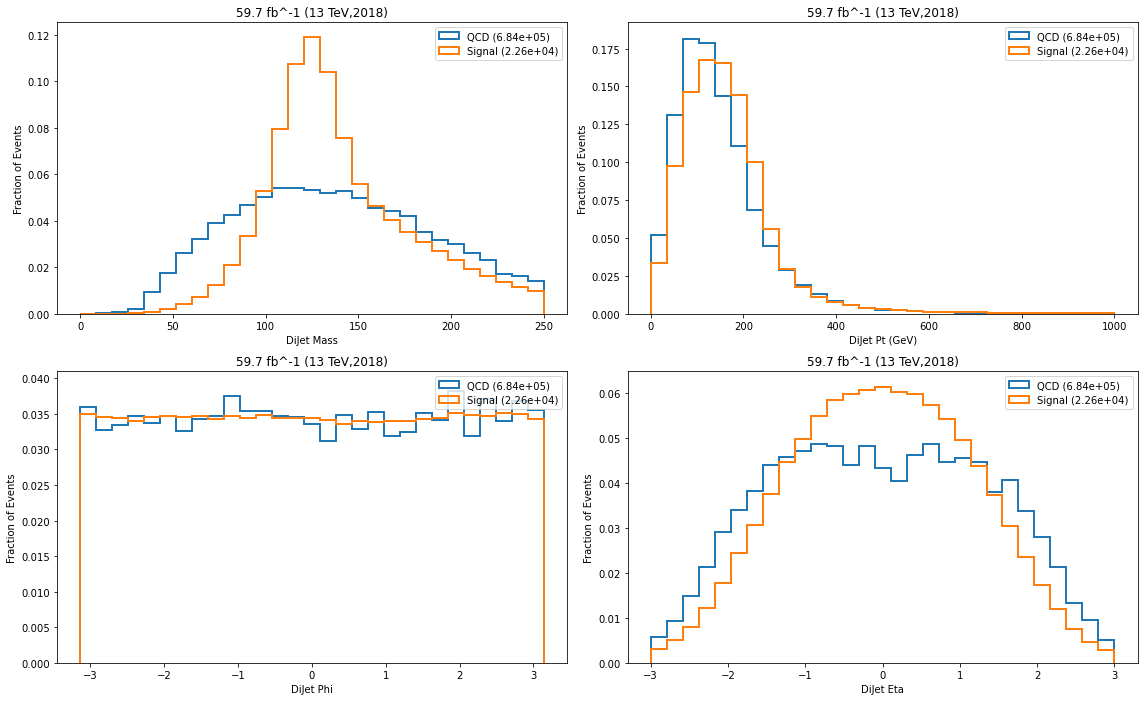

In [5]:
study.higgs(trees,variable="higgs_m",saveas="baseline_norm",density=1)

In [6]:
higgs_mass_cr = lambda tree : Selection(tree,mask=ak.all(np.abs(tree["higgs_m"]-125)>30,axis=-1))
selection_hm_cr = [ higgs_mass_cr(tree) for tree in trees ]

In [7]:
print_bovers(selection_hm_cr)

QCD/Signal: 49.33
--- all QCD ---
Event Efficiency:   0.51
--- all Signal ---
Event Efficiency:   0.23
Selected Purity(6): 0.21
Passed Jet S/T:     0.68
------


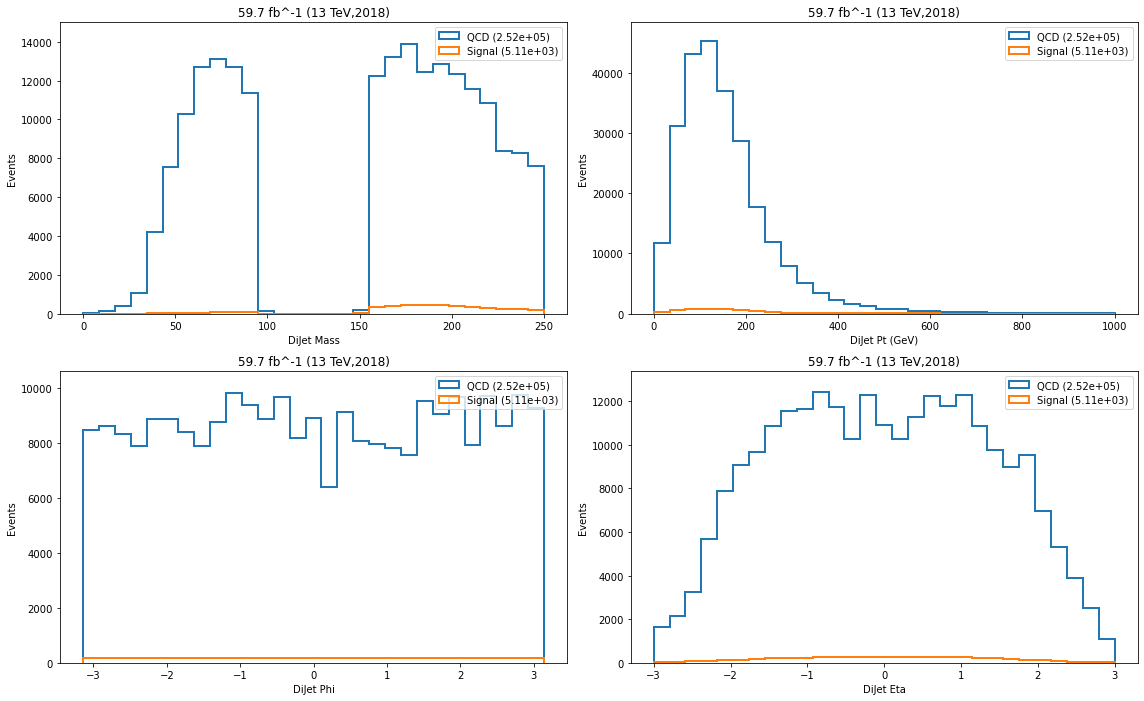

In [8]:
study.higgs(selection_hm_cr,density=0,saveas="higgs_mass_veto")

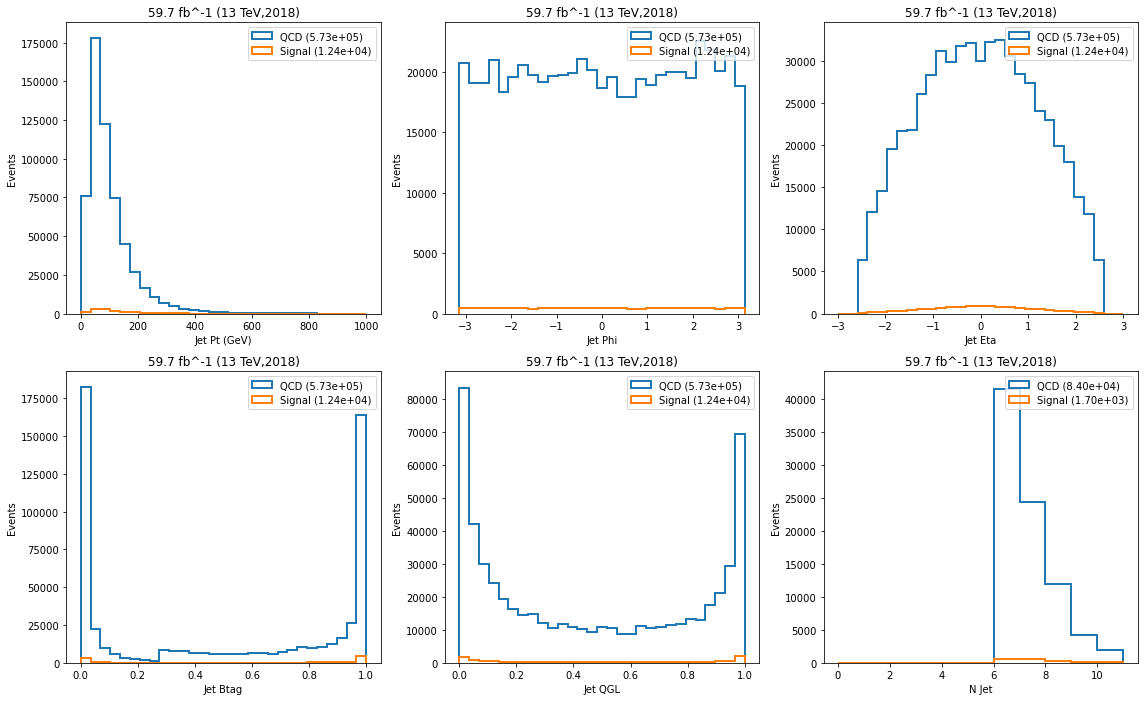

In [9]:
study.jets(selection_hm_cr,saveas="higgs_mass_veto")

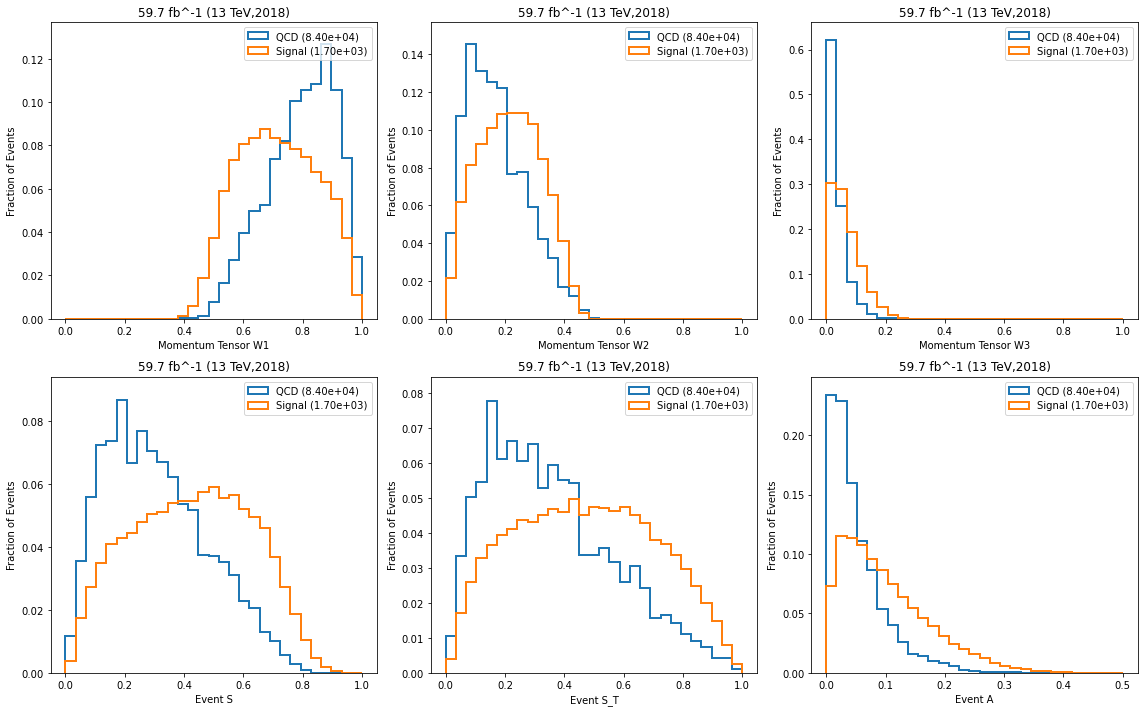

In [10]:
study.jet_sphericity(selection_hm_cr,density=1,saveas="higgs_mass_veto")

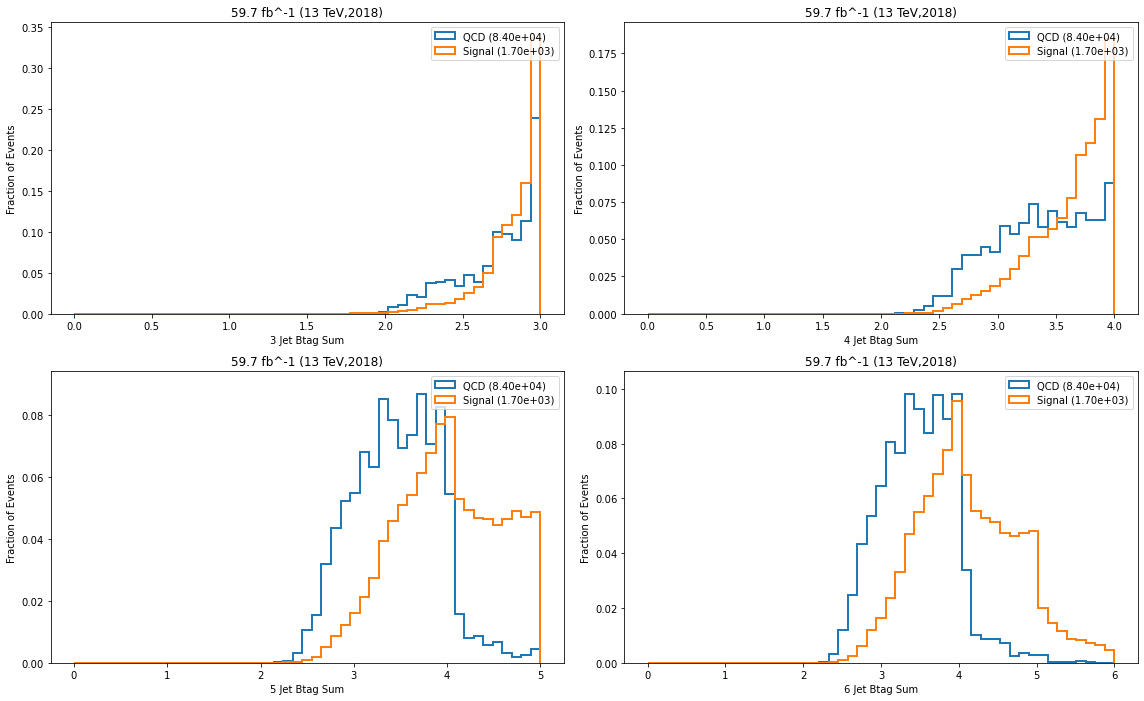

In [11]:
study.njet_var_sum(selection_hm_cr,density=1,saveas="higgs_mass_veto")

In [12]:
# hm_cr_mbtag = [ selection.chosen_jets(cuts={"btagcut":jet_btagWP[mediumWP]}) for selection in selection_hm_cr ]

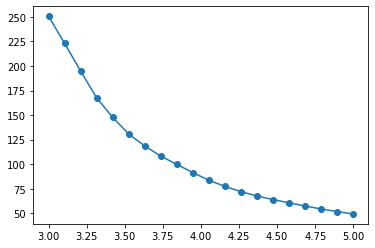

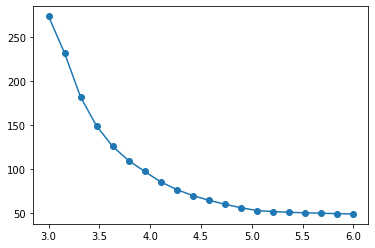

In [13]:
scores = optimize_var_cut(selection_hm_cr,"jet5_btagsum",varmin=3,method=min)
graph_simple(*scores);

scores = optimize_var_cut(selection_hm_cr,"jet6_btagsum",varmin=3,method=min)
graph_simple(*scores);

# scores = optimize_var_cut(hm_cr_mbtag,"n_jet",varmin=4,method=min)
# graph_simple(*scores);

In [14]:
hm_cr_btagsum = [ selection.masked( selection.get("jet6_btagsum") < 4 ) for selection in selection_hm_cr ]
hm_cr_btagwp = [ selection.masked( ak.sum(selection.get("jet_btag")>jet_btagWP[mediumWP],axis=-1)==4 ) for selection in selection_hm_cr ]

In [15]:
print_bovers(hm_cr_btagsum)
print_bovers(hm_cr_btagwp)

QCD/Signal: 93.68
--- all QCD ---
Event Efficiency:   0.46
--- all Signal ---
Event Efficiency:   0.11
Selected Purity(6): 0.11
Passed Jet S/T:     0.66
------
QCD/Signal: 94.78
--- all QCD ---
Event Efficiency:   0.46
--- all Signal ---
Event Efficiency:   0.11
Selected Purity(6): 0.11
Passed Jet S/T:     0.66
------


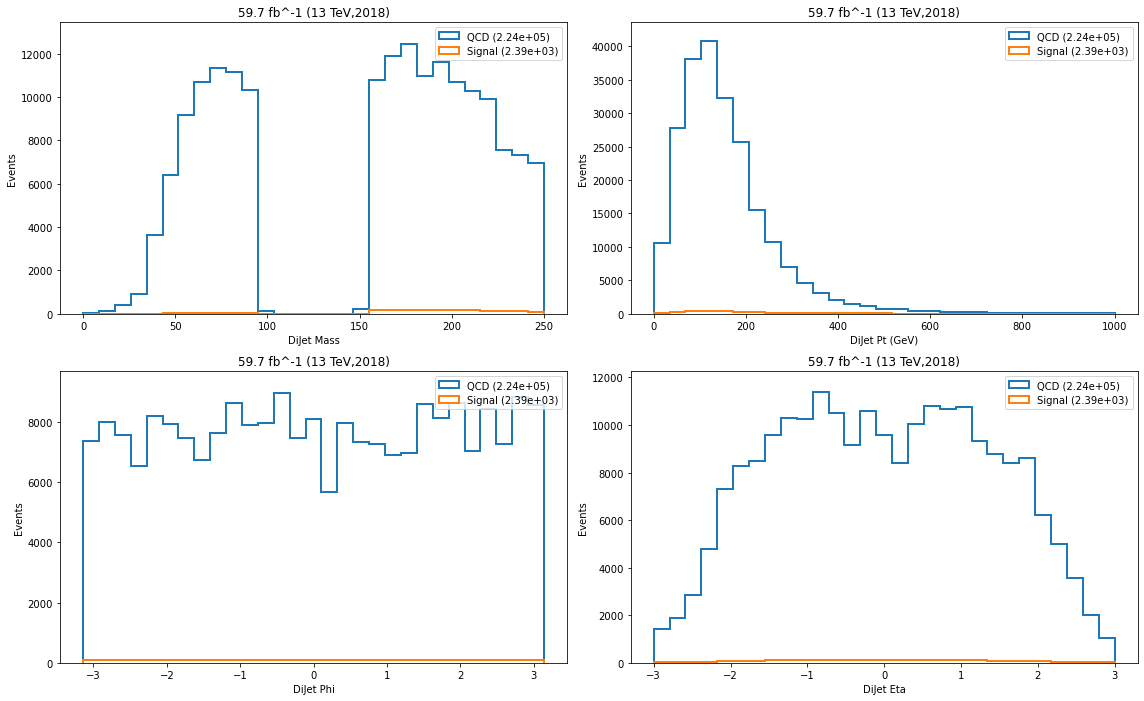

In [16]:
study.higgs(hm_cr_btagsum,saveas="hm_btagsum")

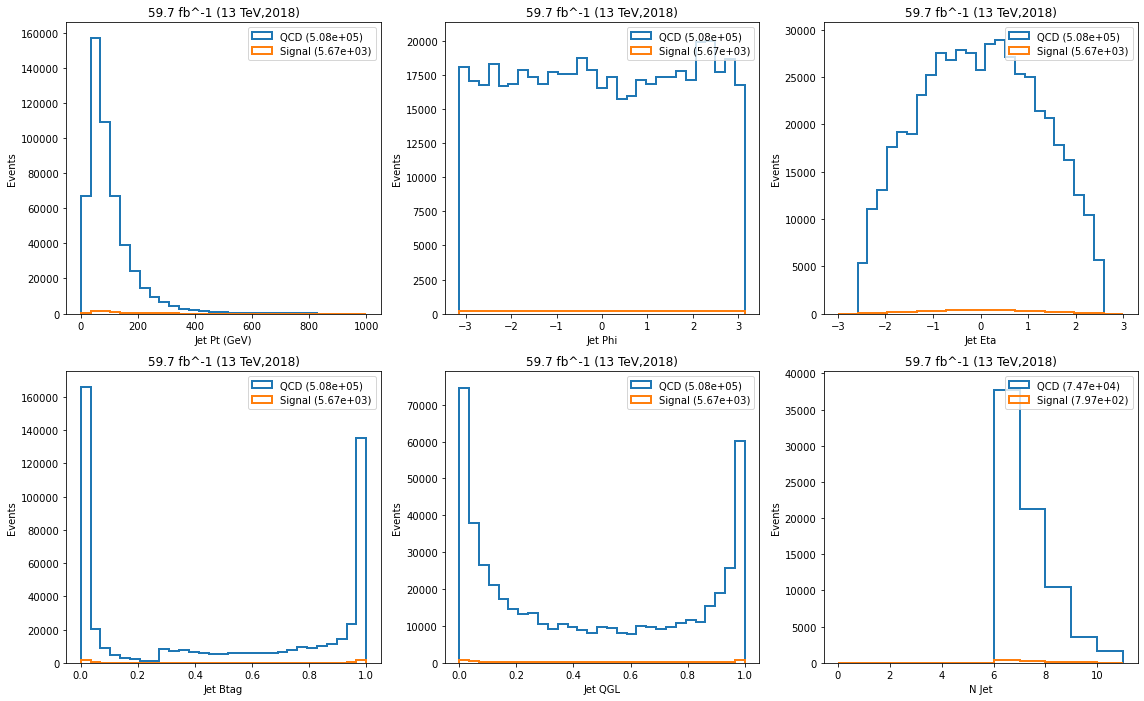

In [17]:
study.jets(hm_cr_btagsum,saveas="hm_btagsum")